Let's look at the GEMS output that I got

In [6]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import pandas as pa
import os

/Users/yoachim/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
files = ['GAIA_GUMS_MW_nside16_832.csv', 'GAIA_GUMS_MW_nside16_834.csv', 
         'GAIA_GUMS_MW_nside16_836.csv', 'GAIA_GUMS_MW_nside16_838.csv',
         'GAIA_GUMS_MW_nside16_833.csv', 'GAIA_GUMS_MW_nside16_835.csv', 
         'GAIA_GUMS_MW_nside16_837.csv', 'GAIA_GUMS_MW_nside16_839.csv']
path = '/Users/yoachim/ulysses/gums'


In [3]:
gums = pa.read_csv(os.path.join(path, files[0]))

In [4]:
for filename in files[1:]:
    temp = pa.read_csv(os.path.join(path, filename))
    gums.append(temp)

,sourceExtendedId,raj2000,dej2000,meanAbsoluteV,magG,magGBp,magGRp,magGRvs,alpha,delta,...,population,rEnvRStar,radius,semimajorAxis,teff,variabilityAmplitude,variabilityPeriod,variabilityPhase,variabilityType,vsini
0,*145662025-000001+,337.499972,19.481948,0.900,10.603,11.071,9.949,9.659,337.499962,19.481922,...,1,0.0,0.00,0.000000,0,0.0,0.0,0.0,NaN,0.0
1,*145662025-000001A,337.499957,19.481958,0.900,10.603,11.071,9.949,9.659,337.499947,19.481931,...,1,0.0,13.37,0.000000,4786,0.0,0.0,0.0,NaN,4.2
2,*145662025-000001B,337.500086,19.481878,12.300,21.177,22.543,19.962,19.400,337.500076,19.481852,...,1,0.0,0.20,545.670000,3296,0.0,0.0,0.0,NaN,1.1
3,*145662024-000001,337.499801,19.492204,9.500,19.029,20.021,17.987,17.515,337.499777,19.492166,...,1,0.0,0.52,0.000000,3758,0.0,0.0,0.0,NaN,1.8
4,*145662027-000001,337.511876,19.488170,11.400,19.563,20.807,18.396,17.860,337.511849,19.488125,...,1,0.0,0.28,0.000000,3428,0.0,0.0,0.0,NaN,1.9
5,*145662025-000002,337.507135,19.478654,9.800,19.063,20.090,18.001,17.518,337.507134,19.478639,...,1,0.0,0.48,0.000000,3698,0.0,0.0,0.0,NaN,2.3
6,*145662024-000002,337.499009,19.502681,3.300,15.004,15.338,14.494,14.265,337.498992,19.502662,...,1,0.0,2.54,0.000000,5754,0.0,0.0,0.0,NaN,0.5
7,*145662024-000003,337.496125,19.495846,9.800,19.715,20.766,18.642,18.152,337.496139,19.495868,...,2,0.0,0.42,0.000000,3873,0.0,0.0,0.0,NaN,1.8
8,*145662024-000004+,337.504398,19.501023,8.106,18.453,19.298,17.499,17.069,337.504376,19.500997,...,2,0.0,0.00,0.000000,0,0.0,0.0,0.0,NaN,0.0
9,*145662024-000004A,337.504399,19.501022,8.600,18.995,19.785,18.078,17.666,337.504377,19.500996,...,2,0.0,0.61,0.000000,4140,0.0,0.0,0.0,NaN,0.0


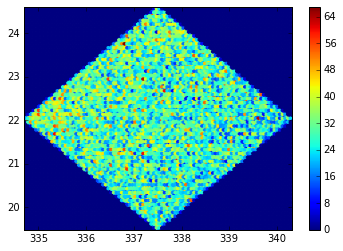

In [14]:
plt.hexbin(gums['raj2000'], gums['dej2000'])
cb = plt.colorbar()

(array([  3.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   1.70000000e+01,   1.50000000e+01,
          1.80000000e+01,   1.50000000e+01,   2.80000000e+01,
          4.50000000e+01,   5.90000000e+01,   8.20000000e+01,
          1.29000000e+02,   1.72000000e+02,   1.70000000e+02,
          2.24000000e+02,   2.29000000e+02,   2.97000000e+02,
          3.58000000e+02,   5.13000000e+02,   5.19000000e+02,
          7.93000000e+02,   8.82000000e+02,   1.15000000e+03,
          1.53300000e+03,   1.82400000e+03,   2.06000000e+03,
          2.45700000e+03,   2.84700000e+03,   3.34400000e+03,
          3.69300000e+03,   4.22700000e+03,   4.82700000e+03,
          5.73300000e+03,   6.49300000e+03,   7.63200000e+03,
          8.77600000e+03,   1.00240000e+04,   1.14080000e+04,
          1.30080000e+04,   1.43220000e+04,   1.59160000e+04,
          8.68700000e+03,   3.25400000e+03,   2.87800000e+03,
          2.36100000e+03,   2.31300000e+03,   2.21500000e+03,
        

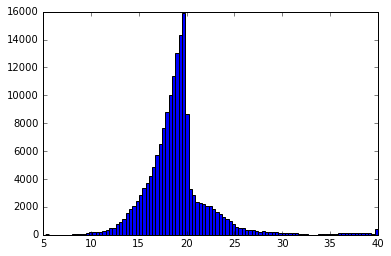

In [12]:
plt.hist(gums['magG'], bins=100)